In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, random, shutil, time
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sys

#mac
util_path = "/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/util"

#constance
'''args = sys.argv[0:]
py_file = args[0]
py_file_wo_path = os.path.basename(py_file)

code_location = os.path.dirname(os.path.abspath(py_file))
index_of_latest = code_location.index('latest')
util_path = os.path.join(code_location[:index_of_latest], "latest", "util")
'''

sys.path.insert(0, util_path)

In [11]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd/2_bmd/latest/phase_I_II_LPR/240_timepoints/0_conc/12_sec_time_interval


In [12]:
# mac       - phase I && II - LPR - after_merging - 240 variables
# (made on 4/28/2021 in constance)
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/wide/04_28_2021/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_full_240_timepoints_wide_full.csv'

# mac       - phase I && II - LPR - after_merging -  15 variables
# made on 4/28/2021 in constance
#complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/wide/04_28_2021/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_full_15_timepoints_wide_full.csv'


df_lpr = pd.read_csv(complete_file_path, header = 0)
display(df_lpr.head())
display(df_lpr.tail())

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,1030.0,9414.0,A01,1030_9414.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1030.0,9414.0,A02,1030_9414.0_A02,35.6,0.0,1.2,0.0,0.0,0.0,...,0.0,0.0,3.1,12.7,16.3,11.7,13.9,16.0,20.0,18.6
2,1030.0,9414.0,A03,1030_9414.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.6,6.4,7.1,7.6,12.2,13.7,5.5,0.0
3,1030.0,9414.0,A04,1030_9414.0_A04,5.0,0.0,1.7,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1030.0,9414.0,A05,1030_9414.0_A05,1.0,3.0,0.0,0.0,0.0,0.0,...,1.8,14.4,24.2,29.3,16.7,30.8,2.3,0.0,6.4,8.7


,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
46444,998.0,15822.0,H08,998_15822.0_H08,0.0,0.000,0.0,0.0,0.000,0.0,...,7.752,21.537,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000
46445,998.0,15822.0,H09,998_15822.0_H09,0.0,0.000,0.0,0.0,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000
46446,998.0,15822.0,H10,998_15822.0_H10,0.0,0.177,0.0,0.0,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000
46447,998.0,15822.0,H11,998_15822.0_H11,0.0,0.000,0.0,0.0,0.539,0.0,...,6.601,11.960,14.674,9.522,8.786,10.186,9.363,13.65,7.869,9.707
46448,998.0,15822.0,H12,998_15822.0_H12,0.0,0.000,0.0,0.0,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000


In [13]:
# preprocess chemical ids
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(int)
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(str)

display(len(np.unique(df_lpr['chemical.id'])))
#display(np.unique(df_lpr['chemical.id']))
#display(df_lpr.head())
#display(df_lpr.tail())

197

In [14]:
# preprocess plate ids
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(int)
df_lpr['plate.id'] = (df_lpr['plate.id'].values).astype(str)

display(len(np.unique(df_lpr['plate.id'])))
#display(np.unique(df_lpr['plate.id']))
display(df_lpr.head())

471

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,1030,9414,A01,1030_9414.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1030,9414,A02,1030_9414.0_A02,35.6,0.0,1.2,0.0,0.0,0.0,...,0.0,0.0,3.1,12.7,16.3,11.7,13.9,16.0,20.0,18.6
2,1030,9414,A03,1030_9414.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.6,6.4,7.1,7.6,12.2,13.7,5.5,0.0
3,1030,9414,A04,1030_9414.0_A04,5.0,0.0,1.7,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1030,9414,A05,1030_9414.0_A05,1.0,3.0,0.0,0.0,0.0,0.0,...,1.8,14.4,24.2,29.3,16.7,30.8,2.3,0.0,6.4,8.7


## Load morphological data for filtering wells that have dead fish

In [15]:
#mac       - phase I && II - morpho - full
morph_data_file_complete_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/morpho/wide/2_after_fixing_MO24/zf_morphology_data_335_chemicals_2020DEC16_fixed_wide_DNC_0_full.csv'

df_morph = pd.read_csv(morph_data_file_complete_path, header = 0)
display(df_morph.head())
display(len(df_morph))

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRAI,CFIN,CIRC,DNC_,...,PE__,PFIN,PIG_,SM24,SNOU,SOMI,SWIM,TRUN,TR__,YSE_
0,53,9289,A01,53_9289_A01,50.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,53,9289,A02,53_9289_A02,35.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53,9289,A03,53_9289_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,9289,A04,53_9289_A04,5.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,53,9289,A05,53_9289_A05,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


69395

In [16]:
# Goal of this box 
# -> (in df_lpr) leave only rows with non 1 and NA MORT

# Running time
# -> 8 seconds for 1 chemical

# 1. Append additional identifier column (Plate_Well value) to lpr and morphology data
# 2. Find rows in morphology data for which MORT end-point is not 1 or NA
# 3. Using Plate_Well values, find corresponding rows in lpr data to filter the data

# (ref)
# '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/tall/bifurcated/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_merged_full_240_timepoints_cpw_added.csv'
# cpw added here already to save 23 minutes

start_time = time.time()

df_lpr['Chemical_Plate_WELL'] = df_lpr[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
# used to take few minutes, but in 5/9/2021, it takes 23 minutes

display(df_lpr.head())


df_morph['Chemical_Plate_WELL'] = df_morph[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
#display(df_morph.head())
#print("df_morph.shape:" + str(df_morph.shape)) # (69395, 29)

df_morpho_nonna_plate_well = df_morph.Chemical_Plate_WELL[~((df_morph.MORT == 1) | (df_morph.MORT.isnull()))]
#display(df_morpho_nonna_plate_well.head())
#print("df_morpho_nonna_plate_well.shape:" + str(df_morpho_nonna_plate_well.shape)) # (57558,)

df_lpr_filtered = df_lpr.loc[df_lpr['Chemical_Plate_WELL'].isin(list(df_morpho_nonna_plate_well.values))]

#display(df_morpho_nonna_plate_well[0:5])
#display(df_lpr.Chemical_Plate_WELL[0:5])

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) 
# 13 seconds took for 215 chemicals

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,1030,9414,A01,1030_9414.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030_9414_A01
1,1030,9414,A02,1030_9414.0_A02,35.6,0.0,1.2,0.0,0.0,0.0,...,0.0,3.1,12.7,16.3,11.7,13.9,16.0,20.0,18.6,1030_9414_A02
2,1030,9414,A03,1030_9414.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,1.6,6.4,7.1,7.6,12.2,13.7,5.5,0.0,1030_9414_A03
3,1030,9414,A04,1030_9414.0_A04,5.0,0.0,1.7,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030_9414_A04
4,1030,9414,A05,1030_9414.0_A05,1.0,3.0,0.0,0.0,0.0,0.0,...,14.4,24.2,29.3,16.7,30.8,2.3,0.0,6.4,8.7,1030_9414_A05


Done, it took:15.2 seconds


In [17]:
print("\ndf_lpr.shape:" + str(df_lpr.shape))

print("df_lpr_filtered.shape:"+str(df_lpr_filtered.shape) + "\n") 
display('df_lpr_filtered.head()',df_lpr_filtered.head())


df_lpr.shape:(46449, 246)
df_lpr_filtered.shape:(33570, 246)



'df_lpr_filtered.head()'

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,...,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,1030,9414,A01,1030_9414.0_A01,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030_9414_A01
1,1030,9414,A02,1030_9414.0_A02,35.6,0.0,1.2,0.0,0.0,0.0,...,0.0,3.1,12.7,16.3,11.7,13.9,16.0,20.0,18.6,1030_9414_A02
2,1030,9414,A03,1030_9414.0_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,1.6,6.4,7.1,7.6,12.2,13.7,5.5,0.0,1030_9414_A03
3,1030,9414,A04,1030_9414.0_A04,5.0,0.0,1.7,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030_9414_A04
4,1030,9414,A05,1030_9414.0_A05,1.0,3.0,0.0,0.0,0.0,0.0,...,14.4,24.2,29.3,16.7,30.8,2.3,0.0,6.4,8.7,1030_9414_A05


In [19]:
# [Goal] 
# Convert time resolution to minutes (if applicable)
# Create a new dataframe for storing lpr data in the new time-scale (minutes)
# The new dataframe contains the same basic row identifier fields

# Running time
# took 6 seconds for 215 chemicals

start_time = time.time()

#df_lpr_min = df_lpr_filtered_no_na[['chemical.id', 'conc', 'plate.id', 'well']]
df_lpr_min = df_lpr_filtered[['chemical.id', 'conc', 'plate.id', 'well']]

time_index_sec_start   = 5
ori_max_time_index_sec = 240 # from t0 to t239

#report = True
report = False

#interval = "1 min"
#interval = "30 sec"
interval = "12 sec"
print ("interval:" + str(interval))

print ("(before transforming for " + str(interval) + "), df_lpr_min.shape:" + str(df_lpr_min.shape))
# for chemical.id = 53 -> (184, 4)
#display(df_lpr_min.head())


if (interval == "1 min"):
    group_size = 10 # (10 X 6 sec/interval = 1 min/interval)
elif (interval == "30 sec"):
    group_size = 5 # (5 X 6 sec/interval = 30 sec/interval)
else: # interval = "12 sec"
    group_size = 2 # (2 X 6 sec/interval = 12 sec/interval)

num_time_points = 0
for time_index in range(int(ori_max_time_index_sec / group_size)):
    num_time_points += 1
    start_index = time_index_sec_start + group_size * time_index
    end_index = start_index + group_size
    if (report):
        print ("\ntime_index:" + str(time_index))
        print ("start_index:"  + str(start_index))
        print ("end_index:"    + str(end_index))
        
    df_lpr_min_in_this_time_index = pd.DataFrame(np.sum(df_lpr_filtered.iloc[:,start_index:end_index], axis = 1))
    #if (report):
        # print ("df_lpr_min_in_this_time_index.shape:\n" + str(df_lpr_min_in_this_time_index.shape))
        # display(df_lpr_min_in_this_time_index.head())
        # display(df_lpr_min_in_this_time_index.tail())
        # display(df_lpr_min_in_this_time_index)
    
    df_lpr_min_in_this_time_index.columns = ['t' + str(time_index)]
    #lpr_filtered_data_in_minutes_in_this_time_index.columns = np.transpose(['t' + str(i) for i in range(int(ori_max_time_index_sec / group_size))])
    df_lpr_min = pd.concat([df_lpr_min, df_lpr_min_in_this_time_index], axis = 1)
    
    #display(df_lpr_min.head())
    #display(df_lpr_min.tail())
    
pd.set_option('display.max_columns', None)

print ("(after  transforming for " + str(interval) + "), df_lpr_min.shape:" + str(df_lpr_min.shape))
# for chemical.id = 53 -> (184, 28)
#display(df_lpr_min.head())

#print ("\nlen(np.unique(df_lpr_min['chemical.id'])):")
#display(len(np.unique(df_lpr_min['chemical.id'])))
#print ("\nnp.unique(df_lpr_min['chemical.id']):")
#display(np.unique(df_lpr_min['chemical.id']))


#lpr_filtered_data_in_minute.head(100) # this should have only 0~23 Tns

df_lpr_min['chemical_conc'] = df_lpr_min[['chemical.id','conc']].apply(lambda x: '_'.join(x.map(str)), axis = 1)

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Conversion of time interval is done. It took "+str(time_took))


interval:12 sec
(before transforming for 12 sec), df_lpr_min.shape:(33570, 4)
(after  transforming for 12 sec), df_lpr_min.shape:(33570, 124)
Conversion of time interval is done. It took 8.8 seconds


In [24]:
display(df_lpr_min.head())
display(len(df_lpr_min))

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75,t76,t77,t78,t79,t80,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,t100,t101,t102,t103,t104,t105,t106,t107,t108,t109,t110,t111,t112,t113,t114,t115,t116,t117,t118,t119,chemical_conc
0,1030,50.0,9414,A01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.7,26.7,0.0,11.2,20.9,3.3,26.6,36.3,10.3,44.8,44.3,6.2,5.3,29.6,33.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0.0,0.0,0.0,75.3,2.6,1.2,24.1,40.3,30.4,6.3,4.5,15.4,15.5,0.0,32.1,19.9,15.4,26.4,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,16.8,16.7,0.0,2.9,0.0,6.5,16.7,34.9,0.0,0.0,2.2,19.0,0.0,0.0,0.0,31.4,8.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.0,37.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030_50.0
1,1030,35.6,9414,A02,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.4,2.6,0.0,0.0,0.0,0.0,0.0,0.0,33.8,39.9,12.0,36.6,39.8,18.1,44.4,24.8,38.5,32.6,32.8,44.1,32.6,29.3,42.8,35.2,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.1,4.3,0.0,0.0,19.9,20.9,29.9,18.0,34.2,30.9,7.8,29.2,44.1,33.8,42.5,19.8,31.0,1.2,0.0,0.0,0.0,0.0,0.0,0.0,1.6,3.7,0.0,0.0,0.0,0.0,1.3,11.3,0.0,24.5,27.5,2.9,36.5,30.3,24.1,26.0,32.2,28.4,23.9,43.1,39.0,37.0,42.9,37.4,46.9,24.1,0.0,0.0,0.0,0.0,0.0,0.8,1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.9,9.6,0.0,0.0,0.0,15.8,28.0,29.9,38.6,1030_35.6
2,1030,11.2,9414,A03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.3,0.0,0.0,3.4,25.1,15.4,17.9,15.8,15.6,17.9,5.8,18.4,15.5,11.5,12.6,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,37.6,0.0,0.0,0.0,0.0,0.0,0.6,19.7,15.2,0.0,8.1,8.0,13.7,5.7,6.9,7.5,17.3,20.9,10.1,10.6,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4,40.3,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,10.1,17.3,13.4,20.7,5.9,10.4,27.1,9.8,16.1,23.5,7.7,13.6,8.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,11.2,0.0,0.0,0.0,0.0,19.7,22.0,18.1,0.6,0.0,8.0,14.7,25.9,5.5,1030_11.2
3,1030,5.0,9414,A04,1.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,6.1,0.2,0.0,0.0,0.0,7.8,9.6,0.0,0.0,0.0,23.7,18.0,0.0,0.0,0.0,0.0,0.0,0.0,9.4,0.0,1.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7,0.5,0.0,0.0,16.3,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.7,0.0,19.8,0.0,0.0,0.0,5.0,0.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.2,11.7,0.0,0.0,0.0,0.0,0.0,16.8,7.2,0.0,19.3,32.4,28.4,29.5,29.7,33.7,16.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030_5.0
4,1030,1.0,9414,A05,3.0,0.0,0.0,0.0,0.0,1.3,0.0,0.0,0.0,0.0,3.5,0.0,1.0,0.0,0.0,41.1,32.1,0.0,43.4,52.2,38.0,44.8,45.4,45.4,40.7,31.9,21.8,32.3,41.9,26.1,0.0,10.4,0.0,0.0,0.0,0.0,1.8,1.1,0.0,0.0,0.0,0.0,0.0,0.0,6.5,0.0,70.1,30.5,17.4,10.0,52.9,42.4,40.8,17.6,19.8,44.6,15.7,34.5,36.3,47.2,37.6,18.8,34.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,5.8,0.0,11.0,0.0,0.0,29.0,23.2,0.0,0.0,0.0,3.7,47.5,27.1,27.5,13.6,37.4,34.7,28.7,26.7,13.5,8.8,25.8,13.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,4.2,0.0,56.7,8.0,0.0,2.7,16.2,53.5,47.5,2.3,15.1,1030_1.0


33570

5908

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75,t76,t77,t78,t79,t80,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,t100,t101,t102,t103,t104,t105,t106,t107,t108,t109,t110,t111,t112,t113,t114,t115,t116,t117,t118,t119,chemical_conc
5,1030,0.0,9414,A06,0.0,0.0,0.0,1.2,0.0,5.7,1.1,0.0,6.9,0.0,2.7,0.0,3.6,0.0,0.0,18.5,11.2,15.3,20.4,15.5,14.4,26.0,29.7,29.2,24.1,3.0,40.4,1.6,13.5,27.4,28.2,3.0,0.0,0.4,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,3.2,0.0,28.5,10.2,0.0,0.0,17.2,0.0,4.1,1.6,7.4,18.0,0.0,12.4,13.9,22.1,9.3,0.0,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.0,3.6,0.0,0.0,0.0,0.0,7.3,0.0,0.0,2.3,13.6,14.2,27.4,22.0,7.7,13.0,22.1,26.8,14.4,14.3,45.5,24.2,0.0,0.0,17.3,13.7,24.6,0.0,2.6,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.9,0.0,0.0,7.7,0.0,5.4,9.0,3.5,22.2,7.4,1030_0.0
11,1030,0.0,9414,A12,6.9,0.0,5.3,0.0,0.0,0.0,0.0,0.0,0.0,4.9,0.0,1.0,1.3,6.3,0.0,47.6,9.2,0.6,0.0,0.0,9.6,0.0,25.3,10.2,1.3,0.0,0.0,0.0,7.9,0.0,4.3,18.8,0.0,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,15.6,8.2,2.3,9.2,0.0,6.3,17.0,1.3,1.0,6.3,0.3,0.5,32.3,9.3,0.0,1.5,3.2,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.3,17.9,3.8,0.0,0.0,0.0,0.0,0.0,0.8,19.7,6.5,0.0,0.7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.3,23.7,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1030_0.0
17,1030,0.0,9414,B06,2.9,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.5,12.8,0.0,0.0,37.2,37.4,1.5,0.0,20.1,37.8,29.3,35.4,18.9,45.6,11.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.8,3.2,46.3,2.9,0.6,30.4,17.5,7.5,30.1,11.4,27.1,22.7,19.4,36.4,0.4,0.0,12.1,28.3,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.8,0.0,2.5,0.0,0.0,0.0,18.7,30.9,16.5,22.8,33.0,41.2,39.7,15.6,0.0,0.9,22.5,10.0,0.0,0.0,23.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.2,27.9,11.8,0.0,3.3,27.0,20.0,28.2,0.0,23.2,1030_0.0
23,1030,0.0,9414,B12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.1,3.6,0.0,0.0,0.0,8.0,30.7,0.0,0.0,5.7,0.0,0.0,18.0,12.1,0.0,17.6,0.0,2.5,0.0,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.7,10.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.3,21.2,0.0,0.0,0.7,0.0,1.2,0.0,0.0,2.9,0.0,2.5,0.0,3.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.2,8.4,0.0,0.0,0.0,0.0,0.0,0.0,36.8,0.0,0.0,0.0,0.0,9.8,13.2,0.7,2.7,1.8,0.0,4.9,0.1,0.0,0.0,0.0,5.5,0.0,4.2,6.4,7.7,2.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030_0.0
29,1030,0.0,9414,C06,0.0,0.0,8.5,3.5,0.4,3.4,3.1,10.1,15.0,2.9,6.8,86.4,2.9,0.4,0.0,15.8,17.1,49.1,33.4,21.1,7.4,35.7,37.8,27.4,40.3,33.3,0.0,0.0,0.0,3.5,6.5,0.0,0.0,0.0,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,2.8,0.0,0.0,0.0,0.0,0.0,15.3,2.0,0.0,0.0,2.7,7.1,0.0,0.0,16.0,0.5,0.0,0.0,0.0,9.4,2.0,10.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1,4.9,15.9,0.8,0.6,8.0,0.0,0.0,0.0,0.0,0.0,9.6,0.5,0.4,0.0,0.0,0.0,0.0,5.4,0.0,1.5,8.9,0.0,0.4,0.0,0.0,0.0,3.3,1.7,6.0,0.2,0.0,0.0,8.3,0.0,0.0,0.0,0.0,0.0,1.7,0.0,0.0,1030_0.0
35,1030,0.0,9414,C12,0.0,0.0,0.0,0.0,1.6,0.0,0.0,0.0,0.0,17.5,4.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.6,0.0,0.0,0.0,0.0,0.9,0.0,9.0,7.2,0.0,0.0,3.4,17.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.3,4.3,0.0,0.0,0.0,1.6,0.0,0.0,0.0,1.9,20.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030_0.0
41,1030,0.0,9414,D06,0.0,0.0,0.0,0.0,0.0,0.0,5.5,0.0,0.0,0.0,0.0,2.9,0.0,0.0,0.0,6.3,6.3,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1,0.0,0.0,0.0,0.0,0.0,4.8,0.0,0.0,0.0,0.0,

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd/2_bmd/latest/phase_I_II_LPR/240_timepoints/0_conc/12_sec_time_interval
344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_full_240_timepoints_wide_full_0_conc.png


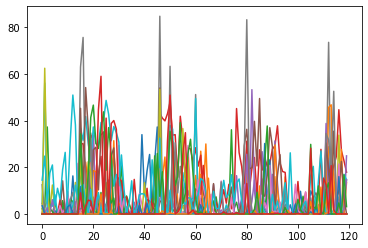

In [25]:
# Plot few lpr curves to check transition points
# 0 concentration

time_index_start = 4 # because 0-3th columns show irrelevant values (e.g. chemical.id, conc, plate.id, well)

df_0_conc       = df_lpr_min.loc[df_lpr_min['conc'] == 0]

#print ("df_0_conc.shape:" + str(df_0_conc.shape))
# chemical.id 414 -> (181, 29)
# all 197 chemicals that have 240 variables -> (15718, 29)

#print (lpr_min.iloc[:1, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

fig, ax = plt.subplots()

ax.plot(np.transpose(df_0_conc.iloc[10:34,time_index_start:time_index_start + num_time_points].values));
#ax.plot(np.transpose(df_0_conc.iloc[:,time_index_start:time_index_start + num_time_points].values));
display(len(df_0_conc))
display(df_0_conc.head(10))

#ax.plot(np.transpose(df_partial_0_conc.iloc[:,time_index_start:time_index_start + num_time_points].values));
#display(len(df_partial_0_conc))
#display(df_partial_0_conc.head(10))

complete_file_path_basename = os.path.basename(complete_file_path)
output_filename_wo_ext = os.path.splitext(complete_file_path_basename)[0]
output_filename = output_filename_wo_ext + "_0_conc.png"
cwd = os.getcwd()
print (cwd)
print (output_filename)
#plt.savefig(output_filename, bbox_inches="tight")

In [26]:
#'''## identify biggest change of peaks in each ccp (chemical_conc_plate)

#trans_points = [3,9,15,21]
#trans_points = [2,8,14,20]   # 1 min interval

#trans_points = [6,18,30,42]
#trans_points = [5,17,29,41]  # 30 sec interval

#trans_points = [15,45,75,105]
trans_points = [14,44,74,104] # 12 sec interval


df_lpr_min_ccp = df_0_conc.copy()
#df_lpr_min_ccp = df_partial_0_conc.copy()
df_lpr_min_ccp.insert(0, 'chemical_conc_plate', df_0_conc.loc[:,['chemical.id','conc','plate.id']].apply(lambda x: '_'.join(x.map(str)), axis = 1))

#f_out = open("report.txt","w+")
arr_max_index_per_trans_14 = []
arr_max_index_per_trans_44 = []
arr_max_index_per_trans_74 = []
arr_max_index_per_trans_104 = []

for ccp in np.unique(df_lpr_min_ccp.chemical_conc_plate):
    #print (str(ccp))
    df_per_ccp = df_lpr_min_ccp.loc[df_lpr_min_ccp.chemical_conc_plate == ccp,:]
    #display(df_per_ccp.head())
    
    for trans_index, trans_point in enumerate(trans_points):
        former_timepoints_mean = 999
        arr_diff = []
        #print ("\ntrans_point:" + str(trans_point))
        for i in range (-2, 4):
            current_timepoint = 't' + str(trans_point+i)
            #print ("current_timepoint:" + str(current_timepoint))
            values = df_per_ccp[current_timepoint]
            #print ("values:" + str(values))
            diff = values.mean() - former_timepoints_mean
            arr_diff.append(diff)
            former_timepoints_mean = values.mean()
        #print ("arr_diff:"+str(arr_diff))
        max_diff = max(arr_diff)
        index_of_max_diff = arr_diff.index(max_diff)
        
        unique_ccp = np.unique(df_per_ccp['chemical_conc_plate'])
        save_this = unique_ccp[0]
        save_this = save_this + " trans_point: " + str(trans_point) + ", index_of_max_diff: " + str(index_of_max_diff) + "\n"
        #print (save_this)
        
        #print (index_of_max_arr_diff)
        #f_out.write(save_this)
        if (trans_point == 14):
            arr_max_index_per_trans_14.append(index_of_max_diff)
        elif (trans_point == 44):
             arr_max_index_per_trans_44.append(index_of_max_diff)
        elif (trans_point == 74):
            arr_max_index_per_trans_74.append(index_of_max_diff)
        else: # (trans_point == 104):
            arr_max_index_per_trans_104.append(index_of_max_diff)
        
#f_out.close()
print ("Biggest change of peaks in each ccp is identified")

Biggest change of peaks in each ccp is identified


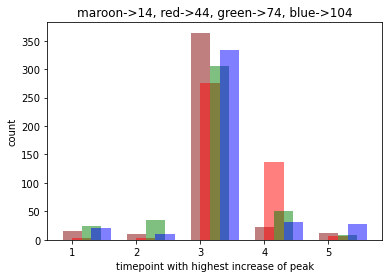


transition points at 2->3 min
mean: 3.01 , std: 0.58

transition points at 8->9 min
mean: 3.33 , std: 0.57

transition points at 14->15 min
mean: 2.96 , std: 0.72

transition points at 20->21 min
mean: 3.08 , std: 0.74


In [27]:
# draw
unique_counts = np.unique(arr_max_index_per_trans_14)
x_14_unique = []
y_14 = []
for i in range(len(unique_counts)):
    x_14_unique.append(unique_counts[i])
    count = arr_max_index_per_trans_14.count(unique_counts[i])
    y_14.append(count)

unique_counts = np.unique(arr_max_index_per_trans_44)
x_44_unique = []
y_44 = []
for i in range(len(unique_counts)):
    x_44_unique.append(unique_counts[i])
    count = arr_max_index_per_trans_44.count(unique_counts[i])
    y_44.append(count)

unique_counts = np.unique(arr_max_index_per_trans_74)
x_74_unique = []
y_74 = []
for i in range(len(unique_counts)):
    x_74_unique.append(unique_counts[i])
    count = arr_max_index_per_trans_74.count(unique_counts[i])
    y_74.append(count)

unique_counts = np.unique(arr_max_index_per_trans_104)
x_104_unique = []
y_104 = []
for i in range(len(unique_counts)):
    x_104_unique.append(unique_counts[i])
    count = arr_max_index_per_trans_104.count(unique_counts[i])
    y_104.append(count)
    
alpha=0.5
plt.bar(np.array(x_14_unique),       y_14,  color ='maroon',width = 0.3, alpha=alpha)
plt.bar(np.array(x_44_unique) +0.15, y_44,  color ='red',   width = 0.3, alpha=alpha)
plt.bar(np.array(x_74_unique)+0.3,   y_74, color ='green', width = 0.3, alpha=alpha)
plt.bar(np.array(x_104_unique)+0.45, y_104, color ='blue',  width = 0.3, alpha=alpha)
    
plt.xlabel("timepoint with highest increase of peak")
plt.ylabel("count")
plt.title("maroon->14, red->44, green->74, blue->104")
plt.show()

print ("\ntransition points at 2->3 min")
print ("mean:", round(np.mean(arr_max_index_per_trans_14),2), ", std:", round(np.std(arr_max_index_per_trans_14),2))

print ("\ntransition points at 8->9 min")
#print ("arr_max_index_per_trans_8:" + str(arr_max_index_per_trans_8))
print ("mean:", round(np.mean(arr_max_index_per_trans_44),2), ", std:", round(np.std(arr_max_index_per_trans_44),2))

print ("\ntransition points at 14->15 min")
print ("mean:", round(np.mean(arr_max_index_per_trans_74),2), ", std:", round(np.std(arr_max_index_per_trans_74),2))

print ("\ntransition points at 20->21 min")
print ("mean:", round(np.mean(arr_max_index_per_trans_104),2), ", std:", round(np.std(arr_max_index_per_trans_104),2))

In [ ]:
df_lpr_min.get_value(10, 't1')

In [ ]:
fig, ax = plt.subplots()
boxplot = df_lpr_min.boxplot(column=['t1', 't2', 't3', 't4', 't5', 't6'])

In [ ]:
fig, ax = plt.subplots()
boxplot = df_lpr_min.boxplot(column=['t7', 't8', 't9', 't10', 't11', 't12'])

In [ ]:
fig, ax = plt.subplots()
boxplot = df_lpr_min.boxplot(column=['t13', 't14', 't15', 't16', 't17', 't18'])

In [ ]:
fig, ax = plt.subplots()
boxplot = df_lpr_min.boxplot(column=['t19', 't20', 't21', 't22', 't23'])

In [ ]:
display(len(df_lpr_min_ccp))
display(df_lpr_min_ccp)

In [ ]:
####### stop here
a=b

In [ ]:
## calculate MOV, AUC for 0 chemical concentration only

df_delta_0_conc = df_lpr_min_0_conc[['chemical.id', 'conc', 'plate.id', 'well']].copy()
#'delta' was 'delta_mov_auc'

trans_points = [2,8,14,20] # "official"
#trans_points = [2,8,15,21]
end_points = ['MOV', 'AUC']

num_light = 3 # seems reasonable since interval between middle points of each peak ~= 6
num_dark  = 3

for trans_index, trans_point in enumerate(trans_points):
    for just_index, end_point in enumerate(end_points):
        if (end_point == 'MOV'):
            delta_0_conc['MOV' + str(trans_index + 1)] \
            = lpr_min['t' + str(trans_point + 1)] \
            - lpr_min['t' + str(trans_point)]
        else:
            delta_0_conc['AUC' + str(trans_index + 1)] \
            = sum(lpr_min['t' + str(trans_point + 1 + index_count)] \
                  for index_count in range(num_dark)) \
            - sum(lpr_min['t' + str(trans_point - index_count)] \
                  for index_count in range(num_light))
        
display(delta_0_conc.head(1))
delta_0_conc.to_csv("delta_mov_auc_0_conc.csv", index=False)

In [ ]:
######## investigate whether AUC4 is negative

AUC1_mean_neg = AUC1_mean_pos = AUC2_mean_neg = AUC2_mean_pos = 0
AUC3_mean_neg = AUC3_mean_pos = AUC4_mean_neg = AUC4_mean_pos = 0

unique_chemical_id_s = np.unique(delta_0_conc['chemical.id'])
print (len(unique_chemical_id_s))
for i in range(len(unique_chemical_id_s)):
    chemical_id = unique_chemical_id_s[i]
    #if (chemical_id != 414):
    #    continue
    #print ("\n", chemical_id)
    per_chemical = delta_0_conc.loc[delta_0_conc['chemical.id'] == chemical_id]
    #display(per_chemical)
    #display(per_chemical["AUC4"].mean())

    AUC1_mean = float(per_chemical["AUC1"].mean())
    if (AUC1_mean) < 0:
        AUC1_mean_neg += 1
    else:
        AUC1_mean_pos += 1
            
    AUC2_mean = float(per_chemical["AUC2"].mean())
    if (AUC2_mean) < 0:
        AUC2_mean_neg += 1
    else:
        AUC2_mean_pos += 1
        
    AUC3_mean = float(per_chemical["AUC3"].mean())
    if (AUC3_mean) < 0:
        AUC3_mean_neg += 1
    else:
        AUC3_mean_pos += 1

    AUC4_mean = float(per_chemical["AUC4"].mean())
    if (AUC4_mean) < 0:
        AUC4_mean_neg += 1
    else:
        AUC4_mean_pos += 1

display(AUC1_mean_pos) # 100
display(AUC1_mean_neg) # 1

display(AUC2_mean_pos) # 100
display(AUC2_mean_neg) # 1

display(AUC3_mean_pos) # 100
display(AUC3_mean_neg) # 1

display(AUC4_mean_pos) # 62
display(AUC4_mean_neg) # 39
#display(AUC4_df.head())

In [ ]:
display("before dropna, len(df_lpr_filtered):"+str(len(df_lpr_filtered)))
df_lpr_filtered_no_na = df_lpr_filtered.dropna(how='any')
display("after dropna,  len(df_lpr_filtered_no_na):"+str(len(df_lpr_filtered_no_na)))

is_NaN = df_lpr_filtered.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_lpr_filtered[row_has_NaN]

display(rows_with_NaN.head())
display(len(rows_with_NaN))

In [ ]:
#df_lpr.to_csv("df_lpr_cpw_added.csv",index=False)
df_lpr_filtered.to_csv("df_lpr_filtered_cpw_added.csv",index=False)

In [ ]:
display(df_lpr_filtered_no_na.head())

print ("df_lpr_filtered_no_na.shape:" + str(df_lpr_filtered_no_na.shape))
#(8160610, 7)

#display(len(lpr_filtered_data))
#lpr_filtered_data.to_csv("lpr_filtered_data.csv",index=False)

In [ ]:
# skip this
"(Lisa) LPR (5d): L1: T61-89; D1: T90-119; L2: T120-149; D2: T150-179; L3: T180-209; D3: T210-239"

# (L0,D0) 
# T1 - T60 --> 360 seconds -> 6 minutes

# (L1,D1) 
# T61 - T120 --> 360 seconds -> 6 minutes

# (L2,D2) 
# T121 - T180 --> 360 seconds -> 6 minutes

# (L3,D3) 
# T181 - T240 --> 360 seconds -> 6 minutes

In [ ]:
# calculate new decreasing endpoints
delta_mov_auc_w_decreasing = delta_mov_auc.copy()
for transition_index, transition_point in enumerate(transition_points):
    print ("\ntransition_index:" + str(transition_index))
    print ("transition_point:" + str(transition_point))
    
    for just_index, end_point in enumerate(end_points):
        ori = str(end_point) + str(transition_index + 1)
        #print ("\nori:" + str(ori))
        #print ("delta_mov_auc_w_decreasing[ori]:\n" + str(delta_mov_auc_w_decreasing[ori]))
        
        for new_index in range(len(transition_points)-1):
            final_index = transition_index + new_index
            new = str(end_point) + str(final_index+2)
            #print ("new:" + str(new))
            check_whether_new_exists = new in delta_mov_auc_w_decreasing.columns
            #print ("check_whether_new_exists:"+str(check_whether_new_exists))
            if (check_whether_new_exists == False):
                continue
            name = str(end_point) + str(transition_index + 1) + "_" + str(new)
            print ("name:" + str(name))
            delta_mov_auc_w_decreasing[name] \
                = delta_mov_auc_w_decreasing[ori] - delta_mov_auc_w_decreasing[new]
display (delta_mov_auc_w_decreasing.head(1))

In [ ]:
# calculate final decreasing endpoints
delta_mov_auc_w_decreasing_copied = delta_mov_auc_w_decreasing.copy()
delta_mov_auc_final = delta_mov_auc_w_decreasing.copy()
columns_to_keep = []
for just_index, end_point in enumerate(end_points):
    for (columnName, columnData) in delta_mov_auc_w_decreasing_copied.iteritems():
        if "_" not in columnName:
            continue
        if str(end_point) not in columnName:
            continue
#        print('Colunm Name : ', columnName)
        columns_to_keep.append(columnName)

    delta_mov_auc_w_decreasing_copied_select = delta_mov_auc_w_decreasing_copied.loc[:,columns_to_keep]
    
    # "axis 0” represents rows
    # "axis 1” represents columns

    all_ = delta_mov_auc_w_decreasing_copied_select.sum(axis=1)
   # print ("all_:\n" + str(all_))
    
    final_endpoint_name = str(end_point) + "_all_" 
    delta_mov_auc_final.insert(0, final_endpoint_name, all_)
    

display("delta_mov_auc_final.head():", delta_mov_auc_final.head())
    
delta_mov_auc_final.to_csv("delta_mov_auc_final.csv",index=False)
    

In [ ]:
# Rename column headers to make it compatible with earlier data received from Lisa
delta_mov_auc.rename(columns={"chemical.id": "Chemical.ID", "conc": "CONC", "plate.id": "Plate", "well": "WELL"}, inplace = True)
display(delta_mov_auc.head())
#display(delta_mov_auc.tail())

In [ ]:
import generate_dose_response as gdr
import BMD_BMDL_estimation as bmdest
import Plot_Save as ps

In [ ]:
start_time = time.time()
os.chdir(starting_dir)

if (os.path.isdir("output") == True):
    shutil.rmtree("output")
os.mkdir("output")

output_folder = os.path.join(starting_dir, "output")
os.chdir(output_folder)

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(delta_mov_auc['Chemical.ID'])
    end_points_from_here = ['MOV1','AUC1']
else:
    chemical_id_from_here = [53]
    end_points_from_here = ['MOV1']

#report = True
report = False

for chemical_id in chemical_id_from_here:
    if (report): print("chemical_id:" + str(chemical_id))
    for end_point in end_points_from_here:
        if (report): print("end_point:" + str(end_point))
        # subset original dataframe for a user-specified chemical and end_point pair
        delta_mov_auc_end_point_chemical_id = delta_mov_auc.loc[delta_mov_auc['Chemical.ID'] == chemical_id,['Chemical.ID', 'CONC', 'Plate', 'WELL', end_point]]
        #print("delta_mov_auc_end_point_chemical_id:\n"+str(delta_mov_auc_end_point_chemical_id))
        #print("type(delta_mov_auc_end_point_chemical_id):\n"+str(type(delta_mov_auc_end_point_chemical_id)))
        #print("type(end_point):\n"+str(type(end_point)))

        dose_response = gdr.gen_dose_response_behavior(delta_mov_auc_end_point_chemical_id, end_point)
        if (report): print("dose_response:\n"+str(dose_response))
        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
        test_dose_response = gdr.reformat_dose_response(dose_response)
        #test_dose_response = dose_response
        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took))
# 1 chemical (3756) and 2 endpoints (['MOV1','AUC1']), 140 seconds took
# 7 chemicals and 2 endpoints (['MOV1','AUC1']), 6 minutes took

time_filename = 'running_time.txt'
f_time = open(time_filename, 'w')
f_time.write(str(time_took))
f_time.close()